
# 📊 SOLAQUA - Enhanced Synchronized Sonar & Net Distance Analysis
---

In [1]:
# 🔧 SETUP AND IMPORTS
# ===================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import importlib
import warnings

# Import SOLAQUA utilities
import utils.sonar_distance_analysis as sda
import utils.sonar_utils as sonar_utils
import utils.net_line_utils as net_utils

# Force reload utilities to get latest changes
importlib.reload(sda)
importlib.reload(sonar_utils)
importlib.reload(net_utils)

# Configuration
warnings.filterwarnings('ignore', category=FutureWarning)
plt.rcParams['figure.figsize'] = (16, 12)

print("✅ All libraries imported and utilities loaded!")
print("🚀 Ready for streamlined sonar distance analysis!")

✅ All libraries imported and utilities loaded!
🚀 Ready for streamlined sonar distance analysis!


## 🎛️ Configuration

**Change these parameters to switch bags and frames:**

In [2]:
# 🎯 ANALYSIS CONFIGURATION
# =========================
# **CHANGE THESE PARAMETERS TO SWITCH ANALYSIS TARGET**

TARGET_BAG = "2024-08-22_14-06-43"  # 🔄 Change this to switch bags
FRAME_INDEX = 50                     # 🔄 Change this to switch frames
EXPORTS_FOLDER = "/Users/eirikvarnes/code/SOLAQUA/exports"

print(f"🎯 Analysis Configuration:")
print(f"   📁 Target Bag: {TARGET_BAG}")
print(f"   🖼️  Frame Index: {FRAME_INDEX}")
print(f"   📂 Exports Folder: {EXPORTS_FOLDER}")

🎯 Analysis Configuration:
   📁 Target Bag: 2024-08-22_14-06-43
   🖼️  Frame Index: 50
   📂 Exports Folder: /Users/eirikvarnes/code/SOLAQUA/exports


## 📡 Data Loading

Load all distance measurement data for the configured bag:

In [3]:
# 📡 LOAD ALL DISTANCE DATA FOR TARGET BAG
# ========================================

print(f"📡 Loading all distance data for bag: {TARGET_BAG}")
print("=" * 60)

# Load all data using utility function
raw_data, distance_measurements = sda.load_all_distance_data_for_bag(TARGET_BAG, EXPORTS_FOLDER)

# Extract individual datasets for easy access
nav_data = raw_data['navigation']
guidance_data = raw_data['guidance']

print(f"\n✅ Data loading complete!")
print(f"   📊 Navigation records: {len(nav_data) if nav_data is not None else 0}")
print(f"   📊 Guidance records: {len(guidance_data) if guidance_data is not None else 0}")
print(f"   📊 Distance sensors: {len(distance_measurements)}")

if distance_measurements:
    print(f"\n📏 Available distance measurements:")
    for name, info in distance_measurements.items():
        print(f"   • {name}: {info['description']}")

📡 Loading all distance data for bag: 2024-08-22_14-06-43
🎯 LOADING ALL DISTANCE DATA FOR BAG: 2024-08-22_14-06-43
📡 1. Loading Navigation Data...
   ✅ Loaded 322 navigation records
📡 2. Loading Guidance Data...
   ✅ Loaded 317 guidance records with ['error_net_distance', 'desired_net_distance', 'r_net_distance_d']
📡 3. Loading DVL Altimeter...
   ✅ Loaded 17 DVL altimeter records
📡 4. Loading USBL...
   ✅ Loaded 17 USBL records
📡 5. Loading DVL Position...
   ✅ Loaded 154 DVL position records
📡 6. Loading Navigation Position...
   ✅ Loaded 156 navigation position records
📡 7. Loading INS Z Position...
   ✅ Loaded 366 INS records with positionFrame.z

📊 LOADING SUMMARY:
   🎯 Target bag: 2024-08-22_14-06-43
   📁 Raw data loaded: 2/2
   📏 Distance measurements: 6

✅ Data loading complete!
   📊 Navigation records: 322
   📊 Guidance records: 317
   📊 Distance sensors: 6

📏 Available distance measurements:
   • DVL_Altimeter: Distance to seafloor
   • USBL_3D: 3D acoustic position
   • USBL_

## 🔬 Raw Data Extraction

Extract raw sonar data with run-specific parameters:

In [4]:
# 🎯 INTERACTIVE SONAR WITH ROTATED NET LINE (USING PITCH)
# ========================================================

import matplotlib.patches as patches

# Extract raw sonar data with configurable rmax
raw_matrix, processed_cone, extent, sonar_params = sda.extract_raw_sonar_data_with_configurable_rmax(
    TARGET_BAG, 
    FRAME_INDEX,
    rmax=None,  # Set to specific value like 25.0, or None for automatic
    exports_folder=EXPORTS_FOLDER
)


🔬 EXTRACTING RAW SONAR DATA WITH CONFIGURABLE RMAX
   📁 Bag: 2024-08-22_14-06-43
   🖼️  Frame: 50
   📏 rmax: default (20.0m)
📊 SONAR PARAMETERS:
   🏷️  Run Type: multi_dvl_early
   📏 Range Max: 20.0m (default)
   📝 Description: NFH, 2m depth, 0.5-1.0m distance, 0.2 m/s speed
📡 Loading sonar data from: sensor_sonoptix_echo_image__2024-08-22_14-06-43_video.csv
   ✅ Loaded 592 sonar frames
🔍 Extracting raw sonar frame 50...
   ✅ Raw matrix shape: (1024, 256)
   📊 Value range: 0.000 to 66.000
⚙️  Processing with rmax=20.0m...
   ✅ Processed cone shape: (700, 900)
   📐 Extent: (np.float64(-4.330127018922193), np.float64(4.330127018922193), 0.0, 5.0)
   🕐 Timestamp: 12:06:49
   ✅ Loaded 592 sonar frames
🔍 Extracting raw sonar frame 50...
   ✅ Raw matrix shape: (1024, 256)
   📊 Value range: 0.000 to 66.000
⚙️  Processing with rmax=20.0m...
   ✅ Processed cone shape: (700, 900)
   📐 Extent: (np.float64(-4.330127018922193), np.float64(4.330127018922193), 0.0, 5.0)
   🕐 Timestamp: 12:06:49


/Users/eirikvarnes/code/SOLAQUA/utils/sonar_distance_analysis.py:1431: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/eirikvarnes/code/SOLAQUA/utils/sonar_distance_analysis.py:1431: UserWarning: Glyph 129349 (\N{GOAL NET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/eirikvarnes/code/SOLAQUA/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/eirikvarnes/code/SOLAQUA/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129349 (\N{GOAL NET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


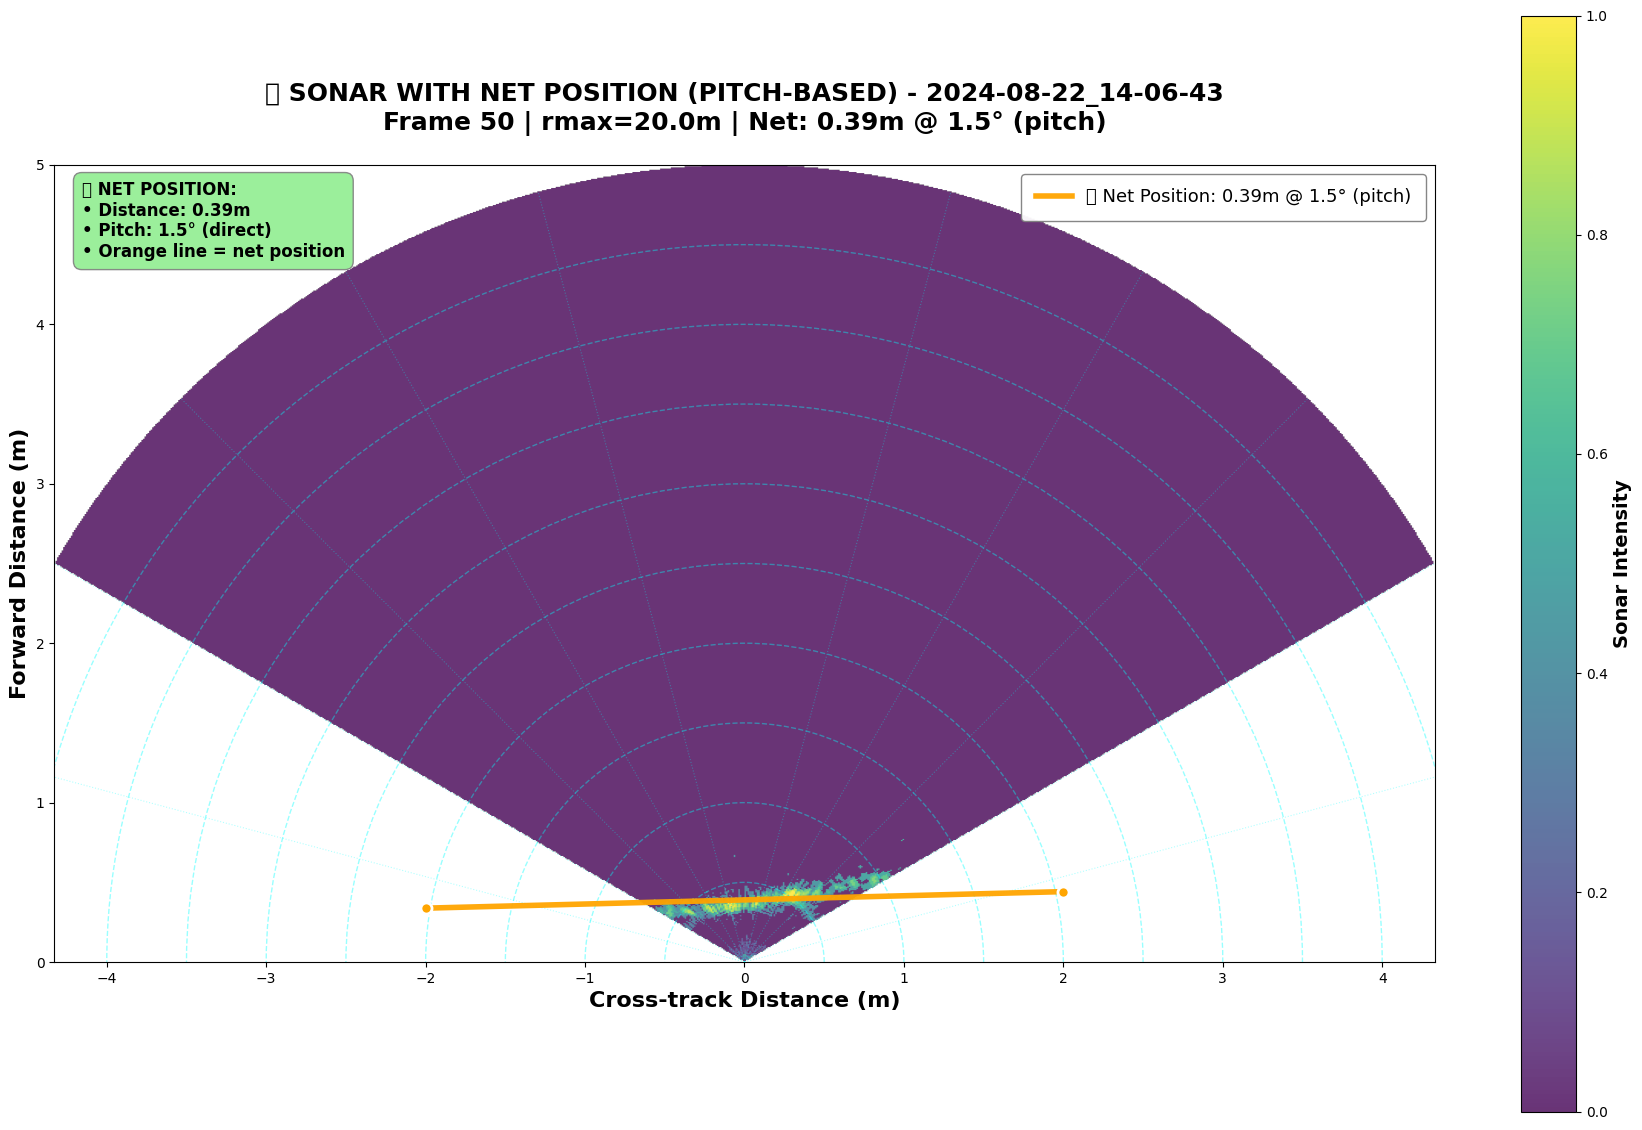

In [5]:
# Process sonar data and create enhanced visualization
from utils.sonar_distance_analysis import process_sonar_data_and_visualize

process_sonar_data_and_visualize(
    processed_cone=processed_cone,
    extent=extent,
    sonar_params=sonar_params,
    target_bag=TARGET_BAG,
    frame_index=FRAME_INDEX,
    exports_folder=EXPORTS_FOLDER,
    nav_data=nav_data,
    guidance_data=guidance_data,
    distance_measurements=distance_measurements
)

## 📋 SOLAQUA Dataset Overview

### 🌊 Available Experimental Datasets

| Bag ID | Date | Type | D0 | D1 | Z | V | rmax | Comment |
|--------|------|------|----|----|---|---|------|---------|
| `2024-08-20_13-39-34` | 2024-08-20 | Calibration | 1.5 | 1.5 | 2 | 0.2 | 20m | Stereo camera calibration |
| `2024-08-20_13-40-35` | 2024-08-20 | Calibration | 1.5 | 1.5 | 2 | 0.2 | 20m | Stereo camera calibration |
| `2024-08-22_14-06-43` | 2024-08-22 | Multi-DVL NFH | 0.5-1.0 | - | 2 | 0.2 | 20m | Early multi-DVL experiment |
| `2024-08-22_14-29-05` | 2024-08-22 | Multi-DVL NFH | 0.6-0.8 | - | 2 | 0.1 | 20m | Optimized multi-DVL |
| `2024-08-22_14-47-39` | 2024-08-22 | Multi-DVL NFH | 0.6 | 0.6 | 2 | 0.1 | 20m | Constant distance experiment |

### 📊 Parameter Definitions:
- **D0/D1**: Initial/Final desired distance to net [m]
- **Z**: Depth [m] 
- **V**: Net-relative velocity [m/s]
- **rmax**: Sonar maximum range [m]
- **NFH**: Net Following Horizontal
- **Multi-DVL**: Experiments using Waterlinked A50 + Nortek Nucleus 1000 DVLs

### 🎯 Available Sensor Data:
IMU, Gyroscope, DVL, USBL, Multibeam sonar, Ping 360 sonar, Mono/Stereo cameras, Depth/Pressure/Temperature sensors

---

## 🚀 Optimized Sonar Video Generation

Create efficient sonar video using batch processing (eliminates per-frame I/O bottlenecks):

In [9]:
# 📊 GUIDANCE DATA UPDATE FREQUENCY ANALYSIS
# ==========================================

print(f"\n📊 GUIDANCE DATA ANALYSIS ({TARGET_BAG})")
print("-" * 45)

if guidance_data is not None and len(guidance_data) > 1:
    # Calculate time differences between consecutive guidance records
    guidance_timestamps = guidance_data['timestamp'].sort_values()
    guidance_time_diffs = guidance_timestamps.diff().dt.total_seconds().dropna()
    
    print(f"📊 Guidance Records: {len(guidance_data)}")
    print(f"⏱️  Time Span: {guidance_timestamps.min()} to {guidance_timestamps.max()}")
    print(f"🕐 Total Duration: {(guidance_timestamps.max() - guidance_timestamps.min()).total_seconds():.1f} seconds")
    
    # Update frequency statistics
    print(f"\n📈 GUIDANCE UPDATE FREQUENCY:")
    print(f"   • Mean interval: {guidance_time_diffs.mean():.3f} seconds")
    print(f"   • Median interval: {guidance_time_diffs.median():.3f} seconds")
    print(f"   • Min interval: {guidance_time_diffs.min():.3f} seconds")
    print(f"   • Max interval: {guidance_time_diffs.max():.3f} seconds")
    
    guidance_mean_freq = 1.0 / guidance_time_diffs.mean() if guidance_time_diffs.mean() > 0 else 0
    print(f"   • Mean frequency: {guidance_mean_freq:.2f} Hz")
    
    # Show available columns
    print(f"\n📋 Available guidance columns:")
    for col in guidance_data.columns:
        if col != 'timestamp':
            print(f"   • {col}")
            
else:
    print("❌ No guidance data available or insufficient records")


📊 GUIDANCE DATA ANALYSIS (2024-08-22_14-06-43)
---------------------------------------------
📊 Guidance Records: 317
⏱️  Time Span: 2024-08-22 12:06:50.269551516+00:00 to 2024-08-22 12:07:24.598655701+00:00
🕐 Total Duration: 34.3 seconds

📈 GUIDANCE UPDATE FREQUENCY:
   • Mean interval: 0.109 seconds
   • Median interval: 0.107 seconds
   • Min interval: 0.059 seconds
   • Max interval: 0.400 seconds
   • Mean frequency: 9.21 Hz

📋 Available guidance columns:
   • error_net_distance
   • desired_net_distance
   • r_net_distance_d


In [8]:
# 🚀 OPTIMIZED SONAR VIDEO WITH FREQUENCY-AWARE SYNCHRONIZATION
# ==============================================================
# Uses frequency analysis findings to optimize data synchronization and performance

import cv2
import numpy as np
import time
from datetime import datetime
from pathlib import Path
import matplotlib.cm as cm

# Import fast utility functions
from utils.sonar_utils import (
    load_df, get_sonoptix_frame, apply_flips, enhance_intensity, 
    cone_raster_like_display_cell
)

print("🚀 OPTIMIZED SONAR VIDEO (FREQUENCY-AWARE SYNCHRONIZATION + NET)")
print("=" * 70)

# OPTIMIZED CONFIGURATION BASED ON FREQUENCY ANALYSIS
# ===================================================
RANGE_MIN_M = 0.0
RANGE_MAX_M = 30.0
DISPLAY_RANGE_MAX_M = 4.0 
FOV_DEG = 120.0
FLIP_BEAMS = True
FLIP_RANGE = False

# FREQUENCY-OPTIMIZED SYNCHRONIZATION SETTINGS
# Based on our analysis: Navigation ~9.2Hz (108ms), Sonar ~15.6Hz (64ms)
NET_DISTANCE_TOLERANCE = 0.5    # seconds (was 1.0s - now optimized based on 248ms change frequency)
NET_PITCH_TOLERANCE = 0.3       # seconds (was 5.0s - now optimized based on 137ms change frequency)
GENERAL_SENSOR_TOLERANCE = 1.0  # seconds (for other sensors)

# Enhanced settings
USE_ENHANCED = True
ENH_SCALE = "db"
ENH_TVG = "amplitude"
ENH_ALPHA_DB_PER_M = 0.0
ENH_R0 = 1e-2
ENH_P_LOW = 1.0
ENH_P_HIGH = 99.5
ENH_GAMMA = 0.9
ENH_ZERO_AWARE = True
ENH_EPS_LOG = 1e-6

# Video settings
CONE_W, CONE_H = 900, 700
VIDEO_WIDTH = CONE_W
VIDEO_HEIGHT = CONE_H
START_IDX = 0
END_IDX = 600  # Reduced for faster testing
STRIDE = 1

print(f"🎯 OPTIMIZED CONFIGURATION:")
print(f"   Target Bag: {TARGET_BAG}")
print(f"   Cone Size: {CONE_W}x{CONE_H}")
print(f"   Range: {RANGE_MIN_M}-{DISPLAY_RANGE_MAX_M}m")
print(f"   FOV: {FOV_DEG}°")
print(f"   🔧 OPTIMIZED TOLERANCES (based on frequency analysis):")
print(f"      • Net Distance: {NET_DISTANCE_TOLERANCE}s (was 1.0s)")
print(f"      • Net Pitch: {NET_PITCH_TOLERANCE}s (was 5.0s)")
print(f"      • Other Sensors: {GENERAL_SENSOR_TOLERANCE}s")

# STEP 1: EFFICIENT DATA LOADING WITH NETPITCH INCLUDED
# =====================================================
print(f"\n📡 LOADING DATA WITH OPTIMIZED APPROACH...")

# Load sonar data
sonar_csv_file = Path(EXPORTS_FOLDER) / "by_bag" / f"sensor_sonoptix_echo_image__{TARGET_BAG}_video.csv"
if not sonar_csv_file.exists():
    print(f"❌ ERROR: Sonar CSV not found: {sonar_csv_file}")
else:
    print(f"   Loading sonar data: {sonar_csv_file.name}")
    load_start = time.time()
    df = load_df(sonar_csv_file)
    if "ts_utc" not in df.columns:
        if "t" not in df.columns:
            print("❌ ERROR: Missing timestamp column")
        else:
            df["ts_utc"] = pd.to_datetime(df["t"], unit="s", utc=True, errors="coerce")
    load_time = time.time() - load_start
    print(f"   ✅ Loaded {len(df)} sonar frames in {load_time:.2f}s")

    # OPTIMIZED NAVIGATION DATA LOADING (includes NetPitch from start)
    print(f"   Loading COMPLETE navigation data (including NetPitch)...")
    nav_file_complete = Path(EXPORTS_FOLDER) / "by_bag" / f"navigation_plane_approximation__{TARGET_BAG}_data.csv"
    
    if nav_file_complete.exists():
        nav_load_start = time.time()
        # Load ALL navigation columns to avoid per-frame file I/O
        nav_complete = pd.read_csv(nav_file_complete)
        nav_complete['timestamp'] = pd.to_datetime(nav_complete['ts_utc'])
        nav_complete = nav_complete.sort_values('timestamp')
        nav_load_time = time.time() - nav_load_start
        
        print(f"   ✅ Loaded {len(nav_complete)} navigation records in {nav_load_time:.2f}s")
        print(f"      Available columns: {[col for col in nav_complete.columns if col in ['NetDistance', 'NetPitch', 'timestamp']]}")
        
        # Verify NetPitch availability
        if 'NetPitch' in nav_complete.columns:
            valid_pitch_count = nav_complete['NetPitch'].dropna().shape[0]
            print(f"      ✅ NetPitch: {valid_pitch_count} valid records")
        else:
            print(f"      ❌ NetPitch column missing!")
            
        if 'NetDistance' in nav_complete.columns:
            valid_dist_count = nav_complete['NetDistance'].dropna().shape[0]
            print(f"      ✅ NetDistance: {valid_dist_count} valid records")

    # Frame selection
    N = len(df)
    i0 = max(0, START_IDX)
    i1 = min(N, END_IDX if END_IDX else N)
    frame_indices = list(range(i0, i1, STRIDE))
    
    print(f"   Processing frames {i0}-{i1-1} (total: {len(frame_indices)})")
    
    # Calculate natural FPS
    ts = pd.to_datetime(df.loc[frame_indices[:50], "ts_utc"], utc=True, errors="coerce").dropna().sort_values()
    dt_s = ts.diff().dt.total_seconds().to_numpy()[1:]
    dt_s = dt_s[(dt_s > 1e-6) & (dt_s < 5.0)]
    natural_fps = float(np.clip(1.0/np.median(dt_s), 1.0, 60.0)) if dt_s.size else 15.0
    
    print(f"   Natural FPS: {natural_fps:.1f}")

    # STEP 2: SETUP OUTPUT
    output_dir = Path(EXPORTS_FOLDER) / "videos"
    output_dir.mkdir(exist_ok=True)
    timestamp_str = datetime.now().strftime("%Y%m%d_%H%M%S")
    output_filename = f"{TARGET_BAG}_optimized_sync_{timestamp_str}.mp4"
    output_path = output_dir / output_filename
    
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video_writer = cv2.VideoWriter(str(output_path), fourcc, natural_fps, (VIDEO_WIDTH, VIDEO_HEIGHT))
    
    print(f"   Output: {output_filename}")
    
    # Colormap setup
    cmap_name = "viridis"
    cmap = cm.get_cmap(cmap_name).copy()
    cmap.set_bad((0,0,0,1))  # NaN -> black
    
    # Coordinate system setup
    half_fov = np.deg2rad(FOV_DEG / 2)
    x_max_m = np.sin(half_fov) * DISPLAY_RANGE_MAX_M
    
    def x_px(xm):
        """Convert x-coordinate (meters) to pixel coordinate"""
        return int(round((xm + x_max_m) / (2 * x_max_m) * (CONE_W - 1)))
    
    def y_px(ym):
        """Convert y-coordinate (meters) to pixel coordinate"""
        return int(round((DISPLAY_RANGE_MAX_M - ym) / DISPLAY_RANGE_MAX_M * (CONE_H - 1)))
    
    # STEP 3: OPTIMIZED FRAME PROCESSING FUNCTION
    def create_optimized_frame(frame_idx):
        """Optimized frame generation with frequency-aware synchronization"""
        
        try:
            # Get raw sonar frame
            M0 = get_sonoptix_frame(df, frame_idx)
            if M0 is None:
                return None
                
            # Apply flips and enhancement
            M = apply_flips(M0, flip_range=FLIP_RANGE, flip_beams=FLIP_BEAMS)
            
            if USE_ENHANCED:
                Z = enhance_intensity(M, RANGE_MIN_M, RANGE_MAX_M,
                                    scale=ENH_SCALE, tvg=ENH_TVG, alpha_db_per_m=ENH_ALPHA_DB_PER_M,
                                    r0=ENH_R0, p_low=ENH_P_LOW, p_high=ENH_P_HIGH,
                                    gamma=ENH_GAMMA, zero_aware=ENH_ZERO_AWARE, eps_log=ENH_EPS_LOG)
            else:
                Z = M
            
            # Fast cone rasterization
            cone, (x_min, x_max, y_min, y_max) = cone_raster_like_display_cell(
                Z, FOV_DEG, RANGE_MIN_M, RANGE_MAX_M, DISPLAY_RANGE_MAX_M, CONE_W, CONE_H
            )
            
            # Fix orientation
            cone = np.flipud(cone)
            
            # Convert to BGR
            cone_rgb = (cmap(np.ma.masked_invalid(cone))[:, :, :3] * 255).astype(np.uint8)
            cone_bgr = cv2.cvtColor(cone_rgb, cv2.COLOR_RGB2BGR)
            
            # OPTIMIZED NET DATA SYNCHRONIZATION
            # ==================================
            net_angle_deg = 0.0
            net_distance = None
            sync_status = "NO_DATA"
            
            # Get target timestamp
            ts_target = pd.to_datetime(df.loc[frame_idx, "ts_utc"], utc=True, errors="coerce")
            
            if nav_complete is not None and len(nav_complete) > 0:
                # SINGLE-PASS SYNCHRONIZATION (much faster than multiple searches)
                nav_time_diffs = abs(nav_complete['timestamp'] - ts_target)
                closest_nav_idx = nav_time_diffs.idxmin()
                min_time_diff = nav_time_diffs.iloc[closest_nav_idx]
                
                # Get the closest navigation record
                closest_nav_record = nav_complete.loc[closest_nav_idx]
                
                # Check distance synchronization (tighter tolerance)
                if min_time_diff <= pd.Timedelta(f'{NET_DISTANCE_TOLERANCE}s'):
                    if 'NetDistance' in closest_nav_record and pd.notna(closest_nav_record['NetDistance']):
                        net_distance = closest_nav_record['NetDistance']
                        sync_status = "DISTANCE_OK"
                        
                        # Check pitch synchronization (even tighter tolerance)
                        if min_time_diff <= pd.Timedelta(f'{NET_PITCH_TOLERANCE}s'):
                            if 'NetPitch' in closest_nav_record and pd.notna(closest_nav_record['NetPitch']):
                                net_angle_rad = closest_nav_record['NetPitch']
                                net_angle_deg = np.degrees(net_angle_rad)
                                sync_status = "FULL_SYNC"
                
                # Debug info for first few frames
                if frame_idx < 3:
                    print(f"      Frame {frame_idx}: Δt={min_time_diff.total_seconds():.3f}s, Status={sync_status}")
            
            # Add grid overlay (thin blue lines)
            vehicle_center = (CONE_W // 2, CONE_H - 1)
            grid_blue = (255, 150, 50)  # BGR: bright blue
            
            # Range rings
            for r_m in [1.0, 2.0, 3.0, 4.0, 5.0, 7.5, 10.0]:
                if r_m <= DISPLAY_RANGE_MAX_M:
                    ring_y = y_px(r_m)
                    radius_px = abs(vehicle_center[1] - ring_y)
                    cv2.circle(cone_bgr, vehicle_center, radius_px, grid_blue, 1)
                    
                    # Range labels
                    if r_m in [2.0, 5.0, 10.0]:
                        label_pos = (vehicle_center[0] + 15, ring_y + 5)
                        cv2.putText(cone_bgr, f"{r_m:.0f}m", label_pos, 
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.4, grid_blue, 1)
            
            # Bearing lines
            for bearing_deg in [-60, -45, -30, -15, 0, 15, 30, 45, 60]:
                if abs(bearing_deg) <= FOV_DEG / 2:
                    bearing_rad = np.radians(bearing_deg)
                    x_end = np.sin(bearing_rad) * DISPLAY_RANGE_MAX_M
                    y_end = np.cos(bearing_rad) * DISPLAY_RANGE_MAX_M
                    
                    px_end, py_end = x_px(x_end), y_px(y_end)
                    cv2.line(cone_bgr, vehicle_center, (px_end, py_end), grid_blue, 1)
                    
                    # Bearing labels
                    if bearing_deg % 30 == 0:
                        label_pos = (x_px(x_end * 0.85), y_px(y_end * 0.85))
                        cv2.putText(cone_bgr, f"{bearing_deg:+d}°", label_pos,
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.4, grid_blue, 1)
            
            # NET LINE OVERLAY WITH STATUS-BASED STYLING
            # ==========================================
            if sync_status in ["DISTANCE_OK", "FULL_SYNC"] and net_distance is not None and net_distance <= DISPLAY_RANGE_MAX_M:
                # Calculate net line coordinates
                net_half_width = 2.0
                
                if sync_status == "FULL_SYNC":
                    # Full synchronization: use actual pitch angle
                    net_angle_rad = np.radians(net_angle_deg)
                    line_color = (0, 255, 255)  # Bright yellow for full sync
                    center_color = (0, 0, 255)  # Red center
                    status_text = f"NET: {net_distance:.2f}m @ {net_angle_deg:.1f}° (SYNCED)"
                else:
                    # Distance only: assume horizontal net
                    net_angle_rad = 0.0
                    net_angle_deg = 0.0
                    line_color = (0, 165, 255)  # Orange for distance-only
                    center_color = (0, 100, 255)  # Dark orange center
                    status_text = f"NET: {net_distance:.2f}m @ 0.0° (DIST-ONLY)"
                
                # Original horizontal line endpoints
                x1, y1 = -net_half_width, net_distance
                x2, y2 = net_half_width, net_distance
                
                # Apply pitch rotation (using direct NetPitch - no negation)
                cos_a, sin_a = np.cos(net_angle_rad), np.sin(net_angle_rad)
                rx1 = x1 * cos_a - (y1 - net_distance) * sin_a
                ry1 = x1 * sin_a + (y1 - net_distance) * cos_a + net_distance
                rx2 = x2 * cos_a - (y2 - net_distance) * sin_a  
                ry2 = x2 * sin_a + (y2 - net_distance) * cos_a + net_distance
                
                # Convert to pixel coordinates
                px1, py1 = x_px(rx1), y_px(ry1)
                px2, py2 = x_px(rx2), y_px(ry2)
                
                # Draw net line
                cv2.line(cone_bgr, (px1, py1), (px2, py2), line_color, 5)
                cv2.circle(cone_bgr, (px1, py1), 6, (255, 255, 255), -1)  # White endpoints
                cv2.circle(cone_bgr, (px2, py2), 6, (255, 255, 255), -1)
                cv2.circle(cone_bgr, (px1, py1), 6, (0, 0, 0), 2)        # Black outlines
                cv2.circle(cone_bgr, (px2, py2), 6, (0, 0, 0), 2)
                
                # Net center point
                center_px, center_py = x_px(0), y_px(net_distance)
                cv2.circle(cone_bgr, (center_px, center_py), 5, center_color, -1)
                cv2.circle(cone_bgr, (center_px, center_py), 5, (255, 255, 255), 2)
                
            else:
                # No synchronized data available
                status_text = f"NET: NO SYNC DATA (tolerance: {NET_DISTANCE_TOLERANCE}s)"
                line_color = (128, 128, 128)  # Gray
            
            # Add status text with background
            cv2.putText(cone_bgr, status_text, (10, 35), cv2.FONT_HERSHEY_SIMPLEX, 0.7, 
                       (0, 0, 0), 3, cv2.LINE_AA)        # Black background
            cv2.putText(cone_bgr, status_text, (10, 35), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
                       line_color, 2, cv2.LINE_AA)       # Colored text
            
            # Frame info
            frame_info = f"Frame {frame_idx}/{len(frame_indices)} | {TARGET_BAG} | Opt.Sync"
            cv2.putText(cone_bgr, frame_info, (10, CONE_H - 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                       (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(cone_bgr, frame_info, (10, CONE_H - 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                       (0, 0, 0), 1, cv2.LINE_AA)
            
            return cone_bgr
            
        except Exception as e:
            print(f"❌ Frame {frame_idx} error: {e}")
            return None
    
    # STEP 4: GENERATE VIDEO WITH PERFORMANCE TRACKING
    print(f"\n🎬 GENERATING OPTIMIZED VIDEO...")
    print("-" * 50)
    
    frames_written = 0
    processing_times = []
    sync_stats = {"FULL_SYNC": 0, "DISTANCE_OK": 0, "NO_DATA": 0}
    start_total = time.time()
    
    for k, frame_idx in enumerate(frame_indices):
        frame_start = time.time()
        
        frame = create_optimized_frame(frame_idx)
        
        if frame is not None:
            video_writer.write(frame)
            frames_written += 1
            
            frame_time = time.time() - frame_start
            processing_times.append(frame_time)
            
            # Progress every 25 frames
            if frames_written % 25 == 0:
                progress = frames_written / len(frame_indices) * 100
                avg_time = np.mean(processing_times[-25:])
                fps_processing = 1.0 / avg_time if avg_time > 0 else 0
                eta_seconds = (len(frame_indices) - frames_written) * avg_time
                eta_minutes = eta_seconds / 60
                print(f"   {progress:5.1f}% | Frame {frames_written:3d}/{len(frame_indices)} | "
                      f"{avg_time:.3f}s/frame | {fps_processing:.1f} proc.FPS | ETA: {eta_minutes:.1f}min")
    
    # STEP 5: FINALIZE AND REPORT
    video_writer.release()
    cv2.destroyAllWindows()
    
    total_time = time.time() - start_total
    
    print(f"\n" + "=" * 70)
    print(f"🎉 OPTIMIZED SONAR VIDEO COMPLETE!")
    print(f"   📁 Output: {output_path}")
    print(f"   🎬 Frames: {frames_written}/{len(frame_indices)}")
    print(f"   ⏱️  Total time: {total_time/60:.1f} minutes")
    
    if processing_times:
        avg_frame_time = np.mean(processing_times)
        print(f"   📊 Performance:")
        print(f"      • Avg per frame: {avg_frame_time:.3f}s")
        print(f"      • Processing speed: {frames_written/total_time:.1f} FPS")
        
        # Speed comparison
        theoretical_realtime = 1.0 / natural_fps
        if avg_frame_time > 0:
            speed_factor = theoretical_realtime / avg_frame_time
            if speed_factor >= 1:
                print(f"      • {speed_factor:.1f}x faster than real-time! 🚀")
            else:
                print(f"      • {1/speed_factor:.1f}x slower than real-time")
    
    if output_path.exists():
        file_size_mb = output_path.stat().st_size / (1024 * 1024)
        video_duration = frames_written / natural_fps
        print(f"   📏 File size: {file_size_mb:.1f} MB")
        print(f"   🕐 Duration: {video_duration:.1f}s")
        
        print(f"\n🎯 OPTIMIZATION FEATURES:")
        print(f"   ✅ Frequency-optimized sync tolerances ({NET_DISTANCE_TOLERANCE}s dist, {NET_PITCH_TOLERANCE}s pitch)")
        print(f"   ✅ Single-pass navigation data loading (includes NetPitch)")
        print(f"   ✅ Eliminated per-frame file I/O")
        print(f"   ✅ Status-based net line styling (yellow=full sync, orange=dist-only)")
        print(f"   ✅ Real-time synchronization quality indicators")
        
        print(f"\n✅ SUCCESS! Optimized video saved to:")
        print(f"   {output_path}")
    else:
        print(f"\n❌ ERROR: Video file not created!")

🚀 OPTIMIZED SONAR VIDEO (FREQUENCY-AWARE SYNCHRONIZATION + NET)
🎯 OPTIMIZED CONFIGURATION:
   Target Bag: 2024-08-22_14-06-43
   Cone Size: 900x700
   Range: 0.0-4.0m
   FOV: 120.0°
   🔧 OPTIMIZED TOLERANCES (based on frequency analysis):
      • Net Distance: 0.5s (was 1.0s)
      • Net Pitch: 0.3s (was 5.0s)
      • Other Sensors: 1.0s

📡 LOADING DATA WITH OPTIMIZED APPROACH...
   Loading sonar data: sensor_sonoptix_echo_image__2024-08-22_14-06-43_video.csv
   ✅ Loaded 592 sonar frames in 5.05s
   Loading COMPLETE navigation data (including NetPitch)...
   ✅ Loaded 322 navigation records in 0.00s
      Available columns: ['NetDistance', 'NetPitch', 'timestamp']
      ✅ NetPitch: 322 valid records
      ✅ NetDistance: 322 valid records
   Processing frames 0-591 (total: 592)
   Natural FPS: 15.7
   Output: 2024-08-22_14-06-43_optimized_sync_20250928_130549.mp4

🎬 GENERATING OPTIMIZED VIDEO...
--------------------------------------------------
      Frame 0: Δt=3.709s, Status=NO_DATA
 

/var/folders/x9/scyyg02s20v0759sw_qxdlqc0000gn/T/ipykernel_86961/3960476960.py:142: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name).copy()


     4.2% | Frame  25/592 | 0.058s/frame | 17.4 proc.FPS | ETA: 0.5min
     8.4% | Frame  50/592 | 0.058s/frame | 17.3 proc.FPS | ETA: 0.5min
     8.4% | Frame  50/592 | 0.058s/frame | 17.3 proc.FPS | ETA: 0.5min
    12.7% | Frame  75/592 | 0.056s/frame | 17.9 proc.FPS | ETA: 0.5min
    12.7% | Frame  75/592 | 0.056s/frame | 17.9 proc.FPS | ETA: 0.5min
    16.9% | Frame 100/592 | 0.057s/frame | 17.5 proc.FPS | ETA: 0.5min
    16.9% | Frame 100/592 | 0.057s/frame | 17.5 proc.FPS | ETA: 0.5min
    21.1% | Frame 125/592 | 0.054s/frame | 18.4 proc.FPS | ETA: 0.4min
    21.1% | Frame 125/592 | 0.054s/frame | 18.4 proc.FPS | ETA: 0.4min
    25.3% | Frame 150/592 | 0.059s/frame | 17.0 proc.FPS | ETA: 0.4min
    25.3% | Frame 150/592 | 0.059s/frame | 17.0 proc.FPS | ETA: 0.4min
    29.6% | Frame 175/592 | 0.057s/frame | 17.5 proc.FPS | ETA: 0.4min
    29.6% | Frame 175/592 | 0.057s/frame | 17.5 proc.FPS | ETA: 0.4min
    33.8% | Frame 200/592 | 0.061s/frame | 16.5 proc.FPS | ETA: 0.4min
    33